# Testing loading model output from ACCESS-CM2-025

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np
%matplotlib inline

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/35951/status,
Dashboard: /proxy/35951/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45065,Workers: 7
Dashboard: /proxy/35951/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:33323,Total threads: 4
Dashboard: /proxy/42131/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:46691,


In [3]:
# CM2 database
#session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/cj877/cj877.db') 
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [6]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [7]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

If you get a 'read-only database' warning, it is because the database has not finished building. 

In [8]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})

In [21]:
CLEX_Red = '#DA1E48'
CLEX_Pink = '#F48580'
CLEX_SkyBlue = '#00BDF2'
CLEX_MidBlue = '#008DD0'
CLEX_CobaldBlue = '#0066B3'
CLEX_MidnightBlue = '#113559'
CLEX_Gray = '#4D4D47'

## Database explorer

In [4]:
from cosima_cookbook import explore
dbx = explore.DatabaseExplorer(session=session_CM2) # session=session
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

In [14]:
pme_river = cc.querying.getvar(expt='cj877', variable='pme_river', 
                          session=session_CM2, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='0502-01-01 00:00:00', 
                          end_time='0502-12-31 00:00:00')
pme_river = pme_river.sel(time=slice('0502-01-01 00:00:00','0502-12-31 00:00:00'))

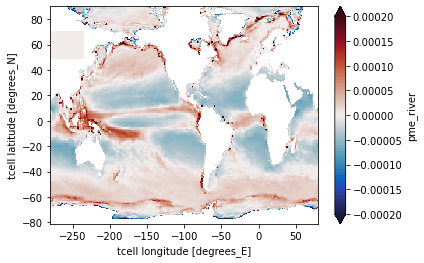

In [20]:
pme_river.mean('time').plot(vmin=-0.0002, vmax=0.0002, cmap=cm.cm.balance)

In [26]:
runoff = cc.querying.getvar(expt='cj877', variable='runoff', 
                          session=session_CM2, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='0502-01-01 00:00:00', 
                          end_time='0502-12-31 00:00:00')
runoff = runoff.sel(time=slice('0502-01-01 00:00:00','0502-12-31 00:00:00'))
runoff = runoff.sel(yt_ocean=slice(-90,-50))

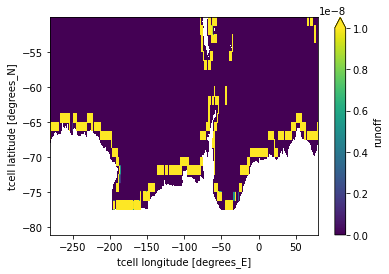

In [30]:
runoff.mean('time').plot(vmin=0, vmax=1e-8)

In [21]:
river = cc.querying.getvar(expt='cj877', variable='river', 
                          session=session_CM2, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='0502-01-01 00:00:00', 
                          end_time='0502-12-31 00:00:00')
river = river.sel(time=slice('0502-01-01 00:00:00','0502-12-31 00:00:00'))

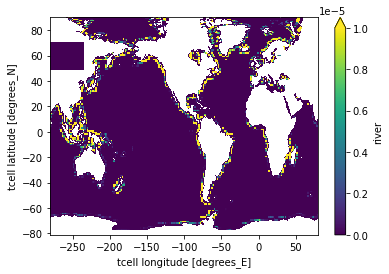

In [25]:
river.mean('time').plot(vmin=0, vmax=0.00001)

In [7]:
variables = cc.querying.get_variables(session_CM2, experiment=expt_CM2_025)
variables

,name,long_name,units,frequency,ncfile,cell_methods,# ncfiles,time_start,time_end
0,ANGLE,angle grid makes with latitude line on U grid,radians,1 daily,history/ice/iceh_d.0400-12.nc,None,4800,0001-01-01 00:00:00,0401-01-01 00:00:00
1,ANGLET,angle grid makes with latitude line on T grid,radians,1 daily,history/ice/iceh_d.0400-12.nc,None,4800,0001-01-01 00:00:00,0401-01-01 00:00:00
2,NCAT,category maximum thickness,m,1 daily,history/ice/iceh_d.0400-12.nc,None,4800,0001-01-01 00:00:00,0401-01-01 00:00:00
3,TLAT,T grid center latitude,degrees_north,1 daily,history/ice/iceh_d.0400-12.nc,None,4800,0001-01-01 00:00:00,0401-01-01 00:00:00
4,TLON,T grid center longitude,degrees_east,1 daily,history/ice/iceh_d.0400-12.nc,None,4800,0001-01-01 00:00:00,0401-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...
324,time,time,days since 0001-01-01 00:00:00,static,history/ocn/ocean-2d-drag_coeff.nc,None,15,0001-01-01 00:00:00,0381-01-01 00:00:00
325,xt_ocean,tcell longitude,degrees_E,static,history/ocn/ocean-2d-dxt.nc,None,7,0001-01-01 00:00:00,0001-01-01 00:00:00
326,xu_ocean,ucell longitude,degrees_E,static,history/ocn/ocean-2d-drag_coeff.nc,None,8,0001-01-01 00:00:00,0381-01-01 00:00:00
327,yt_ocean,tcell latitude,degrees_N,static,history/ocn/ocean-2d-dxt.nc,None,7,0001-01-01 00:00:00,0001-01-01 00:00:00


## Testing loading random variable

In [7]:
start_time = '0001-01-01'
end_time = '0002-12-31'

In [8]:
data = cc.querying.getvar(expt_CM2_025, 'sst', session, start_time=start_time, end_time=end_time, frequency='1 monthly')

In [9]:
data

<xarray.DataArray 'sst' (time: 24, nj: 1080, ni: 1440)>
dask.array<concatenate, shape=(24, 1080, 1440), dtype=float32, chunksize=(1, 540, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0003-01-01 00:00:00
    TLON     (nj, ni) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
Dimensions without coordinates: nj, ni
Attributes:
    units:          degC
    long_name:      sea surface temperature
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged
    time_bounds:    <xarray.DataArray 'time_bounds' (time: 24, d2: 2)>\ndask....
    ncfiles:        ['/g/data/p73/archive/non-CMIP/ACCESS-CM2/cj877/history/i...
    contact:        Martin Dix
    email:          martin.dix@csiro.au
    created:        2021-11-30
    description:    ACCESS-CM2 with n96 atmosphere coupled to COSIMA OM2 0.25...
    url:            https://code.metoffice.gov.uk/svn/roses-u/c/j/8/7/7/trunk

## Scalar diagnostics

In [12]:
start_time = '0001-01-01'
end_time   = '0501-12-31'

In [13]:
def get_scalar_timeseries(expt, session, var, start_time=start_time, end_time=end_time, frequency='1 daily'):
    data = cc.querying.getvar(expt, var, session, start_time=start_time, end_time=end_time, frequency=frequency)
    data = data.sel(time=slice(start_time, end_time)).resample(time='Y').mean()
    data = data.load()
    
    return data

#### Total ocean heat and salt content

In [46]:
%%time
toh = cc.querying.getvar(expt_CM2_025, 'total_ocean_heat', session_CM2, start_time=start_time, end_time=end_time, frequency='1 daily')
toh = toh.sel(time=slice(start_time, end_time))
toh_annual = toh.groupby('time.year').mean(dim='time')
toh_annual = toh_annual.load()

2022-05-23 12:27:08,771 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


CPU times: user 8min 45s, sys: 39.1 s, total: 9min 24s
Wall time: 10min 11s


In [47]:
toh_annual

<xarray.DataArray 'total_ocean_heat' (year: 401, scalar_axis: 1)>
array([[1.96831498],
       [1.96885382],
       [1.96930671],
       [1.97026745],
       [1.97168212],
       [1.97208231],
       [1.97276574],
       [1.9734329 ],
       [1.9747664 ],
       [1.97558322],
       [1.97680785],
       [1.97794553],
       [1.97888871],
       [1.98018356],
       [1.98138084],
       [1.98252311],
       [1.98425482],
       [1.98560713],
       [1.98690011],
       [1.98738708],
...
       [2.26802541],
       [2.26788981],
       [2.26858723],
       [2.26898609],
       [2.2693695 ],
       [2.27017937],
       [2.27047555],
       [2.27140162],
       [2.27199704],
       [2.27308652],
       [2.2740683 ],
       [2.2743008 ],
       [2.27455976],
       [2.27440644],
       [2.27504471],
       [2.27505806],
       [2.27516123],
       [2.27527885],
       [2.27619994],
       [2.2771273 ]])
Coordinates:
  * scalar_axis  (scalar_axis) float64 0.0
  * year         (year) int64 1 2 3 4 5 6 7 8 ... 395 396 397 398 399 400 401

In [49]:
tos = cc.querying.getvar(expt_CM2_025, 'total_ocean_salt', session_CM2, start_time=start_time, end_time=end_time, frequency='1 daily')
tos = tos.sel(time=slice(start_time, end_time))
tos_annual = tos.groupby('time.year').mean(dim='time')
tos_annual = tos_annual.load()

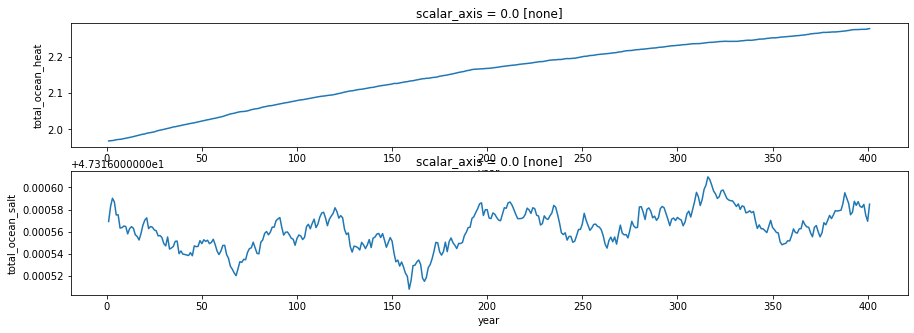

In [50]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(211)
toh_annual.plot()

plt.subplot(212)
tos_annual.plot()

In [51]:
# Save loaded data
toh_annual.to_netcdf(path_to_data + 'toh_annual.nc')
tos_annual.to_netcdf(path_to_data + 'tos_annual.nc')

#### Global average temperature and salinity

In [28]:
%%time
temp_global_ave = get_scalar_timeseries(expt_CM2_025, session_CM2, 'temp_global_ave')

CPU times: user 7min 28s, sys: 30.4 s, total: 7min 59s
Wall time: 8min 38s


In [31]:
%%time
salt_global_ave = get_scalar_timeseries(expt_CM2_025, session_CM2, 'salt_global_ave')

CPU times: user 7min 43s, sys: 23.2 s, total: 8min 6s
Wall time: 8min 46s


In [6]:
# Load pre-calculated data
temp_global_ave = xr.open_dataarray(path_to_data + 'temp_global_ave_annual.nc')
salt_global_ave = xr.open_dataarray(path_to_data + 'salt_global_ave_annual.nc')

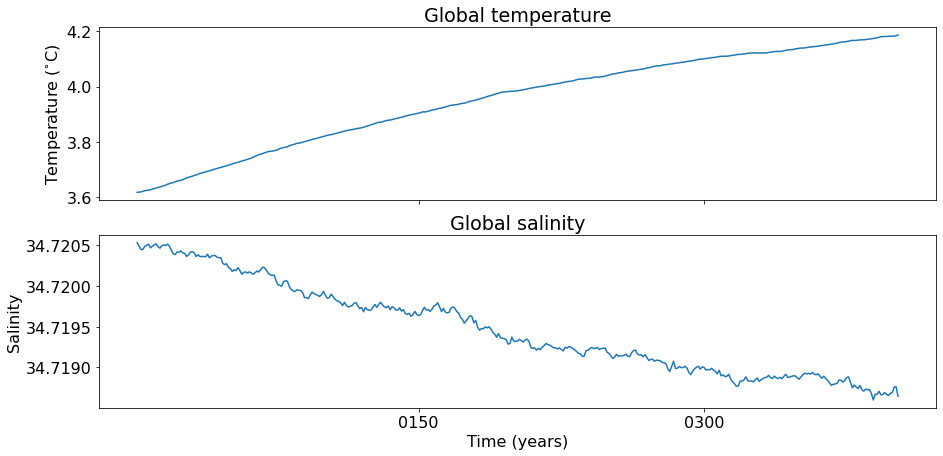

In [66]:
fig = plt.figure(figsize=(15, 7))

plt.subplot(211)
temp_global_ave.plot()
plt.title('Global temperature')
plt.tick_params(labelbottom=False)
plt.xlabel('')
plt.ylabel('Temperature ($^{\circ}$C)')

plt.subplot(212)
salt_global_ave.plot()
plt.title('Global salinity')
plt.ylabel('Salinity')
plt.xlabel('Time (years)');

In [35]:
# Save loaded data
temp_global_ave.to_netcdf(path_to_data + 'temp_global_ave_annual.nc')
salt_global_ave.to_netcdf('/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/' + 'salt_global_ave_annual.nc')

#### Global surface temperature and salinity

In [37]:
%%time
temp_surface_ave = get_scalar_timeseries(expt_CM2_025, session_CM2, 'temp_surface_ave')

CPU times: user 7min 49s, sys: 21.8 s, total: 8min 11s
Wall time: 8min 54s


In [39]:
%%time
salt_surface_ave = get_scalar_timeseries(expt_CM2_025, session_CM2, 'salt_surface_ave')

CPU times: user 7min 50s, sys: 21.4 s, total: 8min 12s
Wall time: 8min 51s


In [40]:
# Save loaded data
#temp_surface_ave.to_netcdf(path_to_data + 'temp_surface_ave_annual.nc')
salt_surface_ave.to_netcdf(path_to_data + 'salt_surface_ave_annual.nc')

In [17]:
%%time
# Years 0-500
temp_CM2_025 = get_scalar_timeseries(expt_CM2_025, session_CM2, 'temp_surface_ave', start_time='0001-01-01', end_time='0500-12-31', frequency='1 daily')

CPU times: user 3min 49s, sys: 8.19 s, total: 3min 57s
Wall time: 4min 2s


In [18]:
temp_CM2_025.to_netcdf(path_to_data + 'temp_surface_ave_annual.nc')

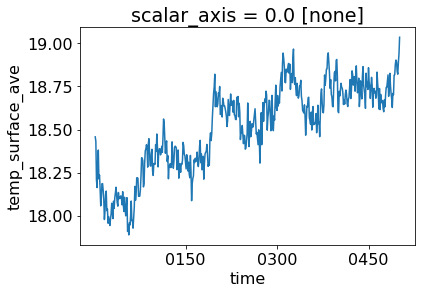

In [21]:
temp_CM2_025.plot()

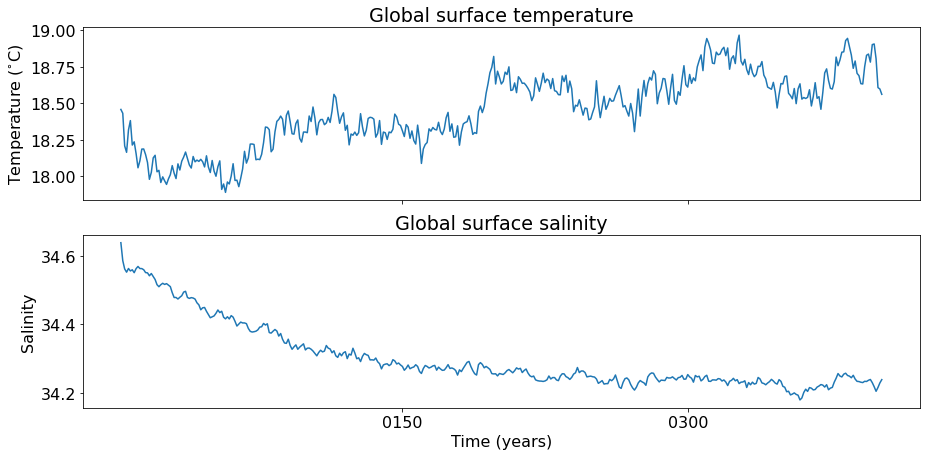

In [65]:
fig = plt.figure(figsize=(15, 7))

plt.subplot(211)
temp_surface_ave.plot()
plt.title('Global surface temperature')
plt.tick_params(labelbottom=False)
plt.xlabel('')
plt.ylabel('Temperature ($^{\circ}$C)')

plt.subplot(212)
salt_surface_ave.plot()
plt.title('Global surface salinity')
plt.ylabel('Salinity')
plt.xlabel('Time (years)');

What sets the variability in the SST?
- Look at upper 700 m temp
- Look at different basins
- Look at surface temperature maps

#### CM2-1 data

In [25]:
%%time
SST_CM2_1 = get_scalar_timeseries(expt_CM2_1, session_CM2, 'temp_surface_ave', start_time='0001-01-01', end_time='1079-12-31', frequency='1 monthly')

CPU times: user 1min 12s, sys: 3.31 s, total: 1min 15s
Wall time: 1min 40s


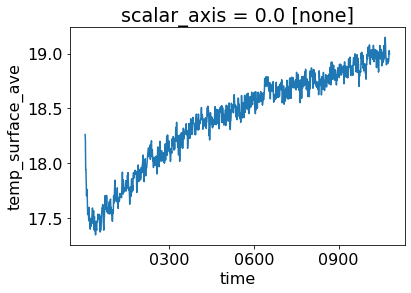

In [26]:
SST_CM2_1.plot()

In [27]:
SST_CM2_1.to_netcdf(path_to_data + '/Comparison_ACCESS_CM2_1/temp_surface_ave_annual_CM2_1.nc')

#### OM2 data

In [ ]:
%%time
SST_OM2_1 = get_scalar_timeseries(expt_OM2_1, session_OM2, 'temp_surface_ave', start_time='1900-01-01', end_time='2400-12-31', frequency='1 monthly')

In [13]:
SST_OM2_1.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_1/temp_surface_ave_annual_OM2_1.nc')

In [ ]:
%%time
SST_OM2_025 = get_scalar_timeseries(expt_OM2_025, session_OM2, 'temp_surface_ave', start_time='1900-01-01', end_time='2400-12-31', frequency='1 monthly')

In [15]:
SST_OM2_025.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_025/temp_surface_ave_annual_OM2_025.nc')

In [16]:
# Load data
temp_surface_ave = xr.open_dataarray(path_to_data + 'temp_surface_ave_annual.nc')
SST_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/temp_surface_ave_annual_OM2_025.nc')
SST_OM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/temp_surface_ave_annual_OM2_1.nc')
SST_CM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/temp_surface_ave_annual_CM2_1.nc')

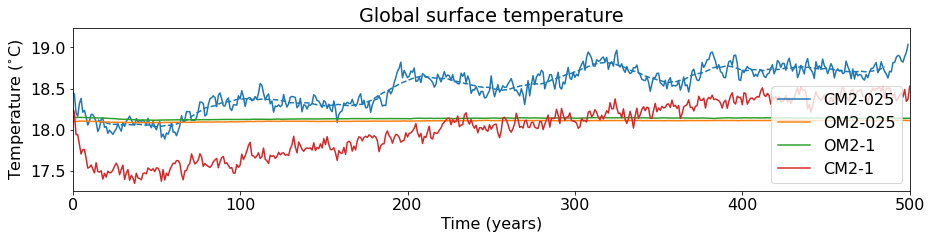

In [17]:
fig = plt.figure(figsize=(15,3))
plt.plot(temp_surface_ave, label='CM2-025')
plt.plot(temp_surface_ave.rolling(time=30, center=True).mean('time'), color='C0', linestyle='--')
plt.plot(SST_OM2_025, label='OM2-025')
plt.plot(SST_OM2_1, label='OM2-1')
plt.plot(SST_CM2_1, label='CM2-1')
plt.legend()
plt.xlim(0, 500)
plt.title('Global surface temperature')
plt.xlabel('Time (years)')
plt.ylabel('Temperature ($^{\circ}$C)');

In [9]:
def get_spectrum(data):
    sampling_rate = 1
    fourier_transform = np.fft.rfft(data)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))
    
    return frequency, power_spectrum

In [10]:
freq, ps = get_spectrum(temp_surface_ave)

200 years
9 years
5 years
3 years
3 years


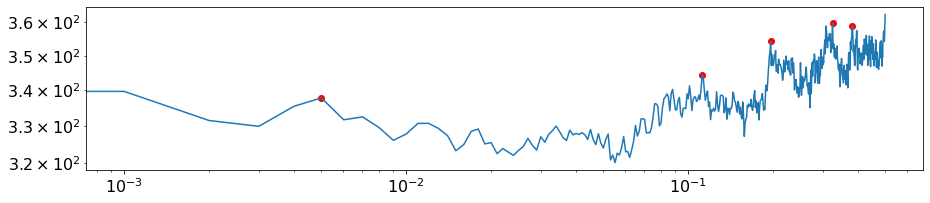

In [11]:
fig = plt.figure(figsize=(15,3))

plt.loglog(freq, ps[:,0])
maxima = [5, 112, 196, 325, 382]
for ii in maxima:
    plt.scatter(freq[ii], ps[ii], color='r')
    print(int(np.round(1/freq[ii])), 'years')

#### Kinetic energy

In [42]:
%%time
ke_tot = get_scalar_timeseries(expt_CM2_025, session_CM2, 'ke_tot')

CPU times: user 7min 50s, sys: 22.3 s, total: 8min 13s
Wall time: 8min 53s


In [9]:
# ke_tot_CM2_025 = xr.open_dataarray(path_to_data + 'ke_tot_annual.nc')

In [43]:
# Save loaded data
ke_tot.to_netcdf(path_to_data + 'ke_tot_annual.nc')

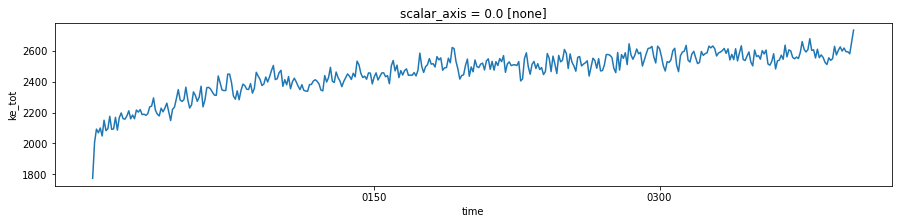

In [45]:
fig = plt.figure(figsize=(15, 3))

plt.subplot(111)
ke_tot.plot()

---

In [14]:
start_time = '0400-01-01'
end_time   = '0499-12-31'

In [ ]:
%%time
ke_tot_CM2_025 = get_scalar_timeseries(expt_CM2_025, session_CM2, 'ke_tot', start_time=start_time, end_time=end_time, frequency='1 daily')

In [16]:
ke_tot_CM2_1 = get_scalar_timeseries(expt_CM2_1, session_CM2, 'ke_tot', start_time=start_time, end_time=end_time, frequency='1 monthly')

In [18]:
start_time = '2300-01-01'
end_time   = '2399-12-31'

In [ ]:
ke_tot_OM2_025 = get_scalar_timeseries(expt_OM2_025, session_OM2, 'ke_tot', start_time=start_time, end_time=end_time, frequency='1 monthly')

In [ ]:
ke_tot_OM2_1 = get_scalar_timeseries(expt_OM2_1, session_OM2, 'ke_tot', start_time=start_time, end_time=end_time, frequency='1 monthly')

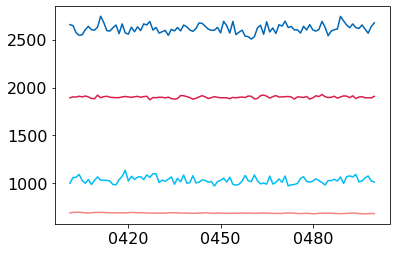

In [30]:
fig = plt.figure()

plt.plot(ke_tot_CM2_025.time, ke_tot_CM2_025, color=CLEX_CobaldBlue, label='CM2-025')
plt.plot(ke_tot_CM2_025.time, ke_tot_CM2_1, color=CLEX_SkyBlue, label='CM2-1')
plt.plot(ke_tot_CM2_025.time, ke_tot_OM2_025, color=CLEX_Red, label='OM2-025')
plt.plot(ke_tot_CM2_025.time, ke_tot_OM2_1, color=CLEX_Pink, label='OM2-1')

In [40]:
print('Globally integrated ocean kinetic energy (10^15 Joules)')
print('CM2-025: ', np.round(ke_tot_CM2_025.mean().values,0))
print('CM2-1: ', np.round(ke_tot_CM2_1.mean().values,0))
print('OM2-025: ', np.round(ke_tot_OM2_025.mean().values,0))
print('OM2-1: ', np.round(ke_tot_OM2_1.mean().values,0))

Globally integrated ocean kinetic energy (10^15 Joules)
CM2-025:  2616.0
CM2-1:  1034.0
OM2-025:  1899.0
OM2-1:  690.0


## Circulation diagnostics

### Transport through straits

In [18]:
straits = { 'DrakePassage': [-69.9, -69.9, -71.6, -51.0],
              'Lombok':     [-244.6, -243.9, -8.6, -8.6],
              'Ombai' :     [-235.0, -235.0, -9.2, -8.1],
              'Timor' :     [-235.9, -235.9, -11.9, -9.9],
              'Bering' :    [-172, -167, 65.8, 65.8],
              'Denmark' :   [-42, -22, 65.8, 65.8],
            }

In [19]:
rho = 1036 # kg/m^3, mean density of seawater

def calc_transport(expt, session, strait):
    """
    Calculate barotropic transport across a given 
     line of latitude or longitude.
     
    Designed for flow through straits.
    """
    
    xmin, xmax, ymin, ymax = straits[strait]
    
    if ymax>=65:
        raise ValueError('North of 65N the tripolar grid geometry brings complications and `.sum(''xt_ocean'')` is wrong!')
    
    print('Calculating {}: {} transport'.format(expt, strait))
    
    if xmin == xmax:       
        tx_trans = cc.querying.getvar(expt, 'tx_trans_int_z', session)
        transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.
        # tx_trans = cc.querying.getvar(expt,'tx_trans',session)
        # transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
        #                     .sel(yt_ocean=slice(ymin, ymax))\
        #                     .sum('st_ocean').sum('yt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.

    elif ymin == ymax:
        ty_trans = cc.querying.getvar(expt, 'ty_trans_int_z', session)
        transport = ty_trans.sel(yu_ocean=ymin, method='nearest')\
                            .sel(xt_ocean=slice(xmin, xmax))\
                            .sum('xt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.
        # ty_trans = cc.querying.getvar(expt,'ty_trans',session)
        # transport = ty_trans.sel(yu_ocean=ymin, method='nearest')\
        #                     .sel(xt_ocean=slice(xmin, xmax))\
        #                     .sum('st_ocean').sum('xt_ocean')/rho/1e6 #divide by ρ to convert to volume transport, m^3/s, and with 1e6 to convert to Sv.
    else:
        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
    
    transport = transport.resample(time='Y').mean()
    transport = transport.compute()
       
    return transport

#### Drake Passage

In [14]:
%%time
DrakePassage = calc_transport(expt_CM2_025, session_CM2, 'DrakePassage')

Calculating cj877: DrakePassage transport


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

CPU times: user 43.2 s, sys: 3.04 s, total: 46.2 s
Wall time: 1min 6s


In [17]:
# Save loaded data
DrakePassage.to_netcdf(path_to_data + 'DrakePassage_transport_annual.nc')

In [25]:
# Load data
DrakePassage = xr.open_dataarray(path_to_data + 'DrakePassage_transport_annual.nc')

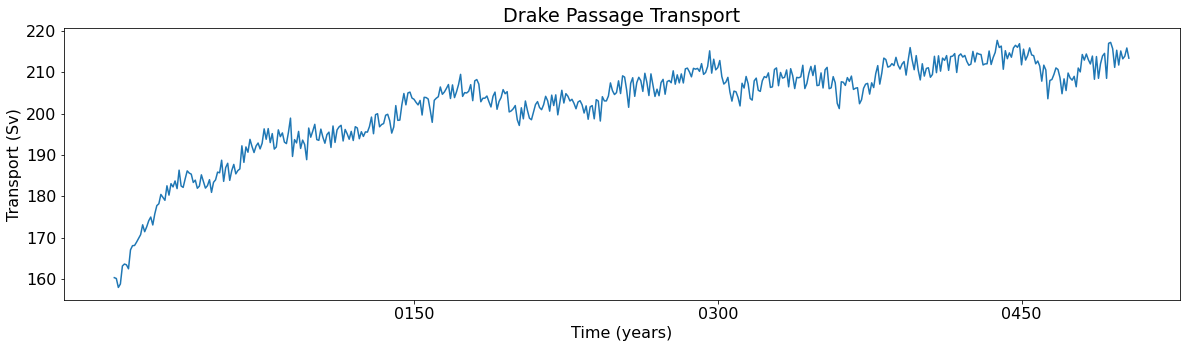

In [19]:
fig = plt.figure(figsize=(20,5))
DrakePassage.plot(linestyle='-')
plt.title('Drake Passage Transport')
plt.xlabel('Time (years)')
plt.ylabel('Transport (Sv)');

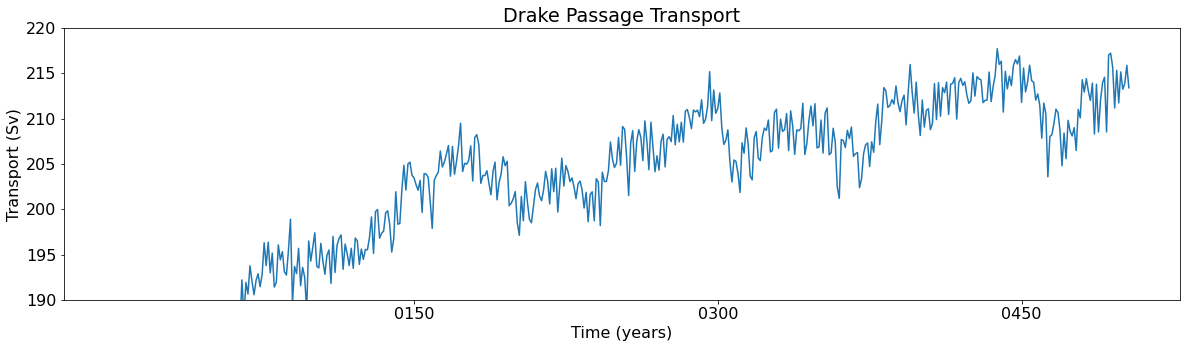

In [20]:
fig = plt.figure(figsize=(20,5))
DrakePassage.plot(linestyle='-')
plt.title('Drake Passage Transport')
plt.xlabel('Time (years)')
plt.ylabel('Transport (Sv)')
plt.ylim(190, 220);

In [67]:
freq, ps = get_spectrum(DrakePassage)

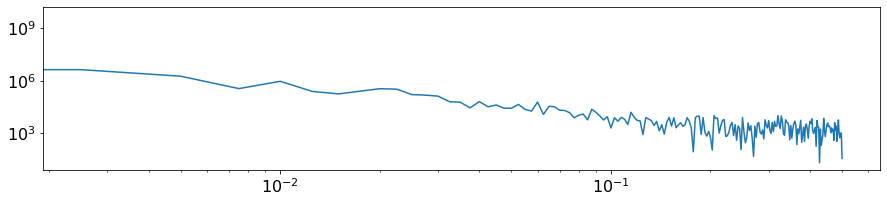

In [69]:
fig = plt.figure(figsize=(15,3))

plt.loglog(freq, ps)
# maxima = [5, 112, 196, 325, 382]
# for ii in maxima:
#     plt.scatter(freq[ii], ps[ii], color='r')
#     print(int(np.round(1/freq[ii])), 'years')

#### Indonesian throughflow

%%time
Lombok = calc_transport(expt_CM2_025, session_CM2, 'Lombok')

In [40]:
# Save loaded data
Lombok.to_netcdf(path_to_data + 'Lombok_transport_annual.nc')

In [41]:
%%time
Ombai = calc_transport(expt_CM2_025, session_CM2, 'Ombai')

Calculating cj877: Ombai transport
CPU times: user 1min 11s, sys: 5.75 s, total: 1min 16s
Wall time: 1min 44s


In [43]:
# Save loaded data
Ombai.to_netcdf(path_to_data + 'Ombai_transport_annual.nc')

In [44]:
%%time
Timor = calc_transport(expt_CM2_025, session_CM2, 'Timor')

Calculating cj877: Timor transport
CPU times: user 1min 12s, sys: 5.79 s, total: 1min 18s
Wall time: 1min 45s


In [46]:
# Save loaded data
Timor.to_netcdf(path_to_data + 'Timor_transport_annual.nc')

In [9]:
# Load data
Lombok = xr.open_dataarray(path_to_data + 'Lombok_transport_annual.nc')
Ombai  = xr.open_dataarray(path_to_data + 'Ombai_transport_annual.nc')
Timor  = xr.open_dataarray(path_to_data + 'Timor_transport_annual.nc')

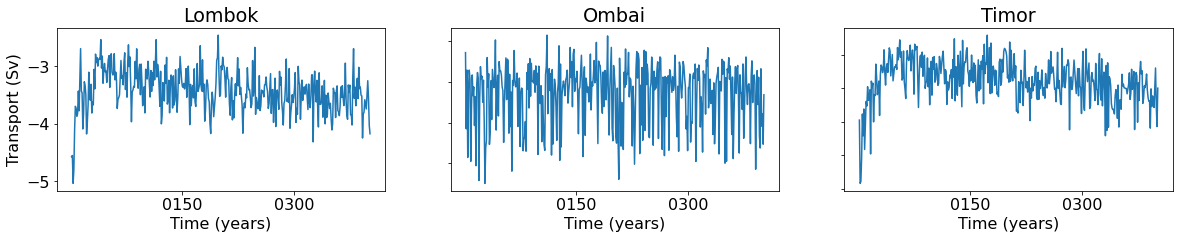

In [63]:
fig = plt.figure(figsize=(20, 3))

plt.subplot(131)
Lombok.plot()
plt.title('Lombok')
plt.ylabel('Transport (Sv)')
plt.xlabel('Time (years)')

plt.subplot(132)
Ombai.plot()
plt.title('Ombai')
plt.tick_params(labelleft=False)
plt.ylabel('')
plt.xlabel('Time (years)')

plt.subplot(133)
Timor.plot()
plt.title('Timor')
plt.ylabel('')
plt.xlabel('Time (years)')
plt.tick_params(labelleft=False);

#### CM2-1

In [21]:
%%time
DrakePassage_CM2_1 = calc_transport(expt_CM2_1, session_CM2, 'DrakePassage')

Calculating bz687: DrakePassage transport


2022-07-12 00:24:42,379 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-07-12 00:24:46,385 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-07-12 00:24:49,405 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-07-12 00:25:36,026 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-07-12 00:25:37,332 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-07-12 00:25:51,002 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-07-12 00:25:55,779 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-07-12 00:25:59,973 - distributed.utils_perf - WARNING - full garbage collections took

CPU times: user 4min 51s, sys: 17 s, total: 5min 8s
Wall time: 11min 16s


In [22]:
DrakePassage_CM2_1.to_netcdf(path_to_data + '/Comparison_ACCESS_CM2_1/DrakePassage_transport_annual_CM2_1.nc')

#### OM2 models

In [ ]:
%%time
DrakePassage_OM2_1 = calc_transport(expt_OM2_1, session_OM2, 'DrakePassage')

In [36]:
DrakePassage_OM2_1.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_1/DrakePassage_transport_annual_OM2_1.nc')

In [ ]:
%%time
DrakePassage_OM2_025 = calc_transport(expt_OM2_025, session_OM2, 'DrakePassage')

In [40]:
DrakePassage_OM2_025.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_025/DrakePassage_transport_annual_OM2_025.nc')

In [20]:
# Load data
DrakePassage = xr.open_dataarray(path_to_data + '/DrakePassage_transport_annual.nc')
DrakePassage_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/DrakePassage_transport_annual_OM2_025.nc')
DrakePassage_OM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/DrakePassage_transport_annual_OM2_1.nc')
DrakePassage_CM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/DrakePassage_transport_annual_CM2_1.nc')

Text(0, 0.5, 'Transport (Sv)')

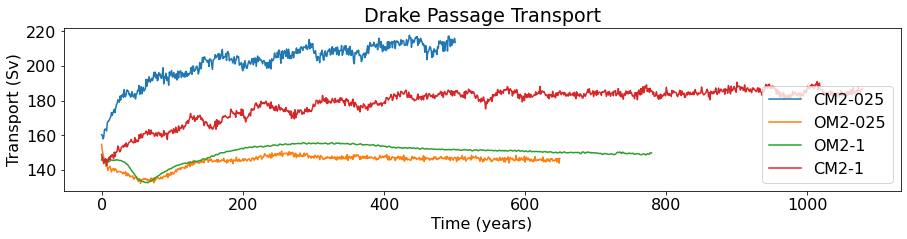

In [21]:
fig = plt.figure(figsize=(15,3))

plt.plot(DrakePassage, label='CM2-025')
plt.plot(DrakePassage_OM2_025, label='OM2-025')
plt.plot(DrakePassage_OM2_1, label='OM2-1')
plt.plot(DrakePassage_CM2_1, label='CM2-1')
plt.legend()

plt.title('Drake Passage Transport')
plt.xlabel('Time (years)')
plt.ylabel('Transport (Sv)')

### Overturning

#### AABW overturning

In [13]:
def get_overturning(expt, session, start_time, end_time, latitude):
    
    var = cc.querying.getvar(expt, 'ty_trans_rho', session, start_time=start_time, end_time=end_time)
    var = var.sel(time=slice(start_time, end_time))
    psi_aabw = var.sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=latitude)*1.0e-9
    psi_aabw_sum = psi_aabw.cumsum('potrho') - psi_aabw.sum('potrho')

    try:
        var2 = cc.querying.getvar(expt, 'ty_trans_rho_gm', session, start_time=start_time, end_time=end_time)
        var2 = var2.sel(time=slice(start_time, end_time))
        psi_aabw_gm = var2.sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=latitude)*1.0e-9
        psi_aabw_sum = psi_aabw_sum + psi_aabw_gm
    except:
        print('GM term not found')

    psi_aabw_sum = -psi_aabw_sum.sel(potrho=slice(1036.2,None)).min('potrho')
    psi_aabw_sum = psi_aabw_sum.resample(time='Y').mean().compute()
    
    return psi_aabw_sum

In [ ]:
%%time
# at 55$^{\circ}$S
psi_AABW_55S = get_overturning(expt_CM2_025, session_CM2, '0301-01-01', '0400-12-31', -55)

In [ ]:
# Save loaded data
psi_AABW_55S.to_netcdf(path_to_data + 'psi_AABW_55S_annual_300_400.nc')

In [14]:
%%time
# at 30$^{\circ}$S
psi_AABW_30S = get_overturning(expt_CM2_025, session_CM2, '0201-01-01', '0300-12-31', -30)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datet

CPU times: user 9min 56s, sys: 40.6 s, total: 10min 37s
Wall time: 12min 29s


In [15]:
# Save loaded data
psi_AABW_30S.to_netcdf(path_to_data + 'psi_AABW_30S_annual_200_300.nc')

In [ ]:
psi_AABW_30S.plot()

In [70]:
# Load + concate + save pre-calculated data
# psi_AABW_55S_1 = xr.open_dataarray(path_to_data + 'psi_AABW_55S_annual.nc')
# psi_AABW_55S_2 = xr.open_dataarray(path_to_data + 'psi_AABW_55S_annual_100_200.nc')
# psi_AABW_55S_3 = xr.open_dataarray(path_to_data + 'psi_AABW_55S_annual_200_300.nc')
# psi_AABW_55S_4 = xr.open_dataarray(path_to_data + 'psi_AABW_55S_annual_300_400.nc')

# psi_AABW_55S = xr.concat([psi_AABW_55S_1, psi_AABW_55S_2, psi_AABW_55S_3, psi_AABW_55S_4], dim="time")
# psi_AABW_55S.to_netcdf(path_to_data + 'psi_AABW_55S_annual.nc')

In [21]:
# # Load + concate + save pre-calculated data
# psi_AABW_30S_1 = xr.open_dataarray(path_to_data + 'psi_AABW_30S_annual.nc')
# psi_AABW_30S_2 = xr.open_dataarray(path_to_data + 'psi_AABW_30S_annual_10_100.nc')
# psi_AABW_30S_3 = xr.open_dataarray(path_to_data + 'psi_AABW_30S_annual_100_200.nc')
# psi_AABW_30S_4 = xr.open_dataarray(path_to_data + 'psi_AABW_30S_annual_200_300.nc')
# psi_AABW_30S_5 = xr.open_dataarray(path_to_data + 'psi_AABW_30S_annual_300_400.nc')

# psi_AABW_30S = xr.concat([psi_AABW_30S_1, psi_AABW_30S_2, psi_AABW_30S_3, psi_AABW_30S_4, psi_AABW_30S_5], dim="time")
# psi_AABW_30S.to_netcdf(path_to_data + 'psi_AABW_30S_annual.nc')

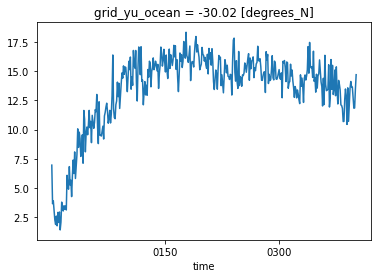

In [19]:
psi_AABW_30S.plot()

In [10]:
# Load pre-calculated data
psi_AABW_55S = xr.open_dataarray(path_to_data + 'psi_AABW_55S_annual.nc')
psi_AABW_30S = xr.open_dataarray(path_to_data + 'psi_AABW_30S_annual.nc')

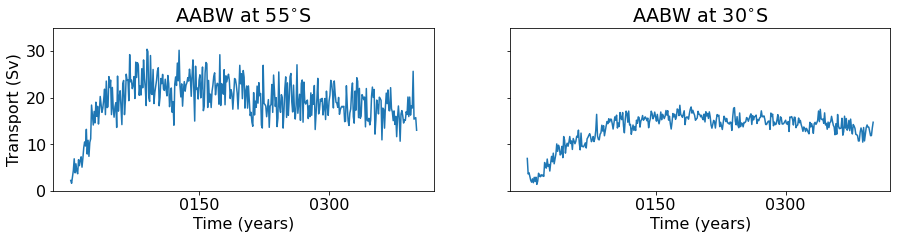

In [11]:
fig = plt.figure(figsize=(15,3))

plt.subplot(121)
psi_AABW_55S.plot()
plt.title('AABW at 55$^{\circ}$S')
plt.xlabel('Time (years)')
plt.ylabel('Transport (Sv)')
plt.ylim(0, 35)

plt.subplot(122)
psi_AABW_30S.plot()
plt.title('AABW at 30$^{\circ}$S')
plt.tick_params(labelleft=False)
plt.ylabel('')
plt.ylim(0, 35)
plt.xlabel('Time (years)');

#### AMOC overturning in density space 

In [14]:
def get_AMOC(expt, session, latitude, start_time='0001-01-1', end_time='0001-12-31', frequency='1 monthly'):
    
    if latitude == 26:
        xt_slice = slice(-103, -5)
    elif latitude == -30:
        xt_slice = slice(-60, 20)
    
    var = cc.querying.getvar(expt, 'ty_trans_rho', session, start_time=start_time, end_time=end_time, frequency=frequency)
    var = var.sel(time=slice(start_time, end_time))
    psi_amoc = var.sel(grid_xt_ocean=xt_slice).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=latitude)*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt, 'ty_trans_rho_gm', session, start_time=start_time, end_time=end_time, frequency=frequency)
        var2 = var2.sel(time=slice(start_time, end_time))
        psi_amoc_gm = var2.sel(grid_xt_ocean=xt_slice).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=latitude)*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
    psi_amoc_sum = psi_amoc_sum.sel(potrho=slice(1035.5,None)).max('potrho')
    psi_amoc_sum = psi_amoc_sum.resample(time='Y').mean().compute()

    return psi_amoc_sum


# cc.querying.getvar(expt='cj877', variable='ty_trans_rho', 
#                           session=session, frequency='1 monthly',
#                           attrs={'cell_methods': 'time: mean'},
#                           start_time='0473-01-31 00:00:00', 
#                           end_time='0488-05-31 00:00:00')

In [38]:
%%time
# at 26$^{\circ}$N
#psi_amoc_26N = get_AMOC(expt_CM2_025, session_CM2, '0301-01-01', '0400-12-31', 26)
psi_amoc_26N_2 = get_AMOC(expt_CM2_025, session_CM2, 26, '0401-01-01', '0499-12-31')

CPU times: user 2min 6s, sys: 6.67 s, total: 2min 13s
Wall time: 3min 11s


In [7]:
# Save loaded data
psi_amoc_26N.to_netcdf(path_to_data + 'psi_AMOC_26N_annual_300_400.nc')

In [16]:
%%time
# at 30$^{\circ}$S
psi_amoc_30S = get_AMOC(expt_CM2_025, session_CM2, '0473-01-31', '0473-12-31', -30)

VariableNotFoundError: No files were found containing 'ty_trans_rho' in the 'cj877' experiment

In [16]:
# Save loaded data
psi_amoc_30S.to_netcdf(path_to_data + 'psi_AMOC_30S_annual_300_400.nc')

In [20]:
# # Load, concatenate and save individual time series
# data1 = xr.open_dataarray(path_to_data + 'psi_AMOC_26N_annual.nc')
# data2 = xr.open_dataarray(path_to_data + 'psi_AMOC_26N_annual_100_200.nc')
# data3 = xr.open_dataarray(path_to_data + 'psi_AMOC_26N_annual_200_300.nc')
# data4 = xr.open_dataarray(path_to_data + 'psi_AMOC_26N_annual_300_400.nc')
# data = xr.concat([data1, data2, data3, data4], dim="time")

In [45]:
# data.to_netcdf(path_to_data + 'psi_AMOC_26N_annual.nc')

In [41]:
# data1 = xr.open_dataarray(path_to_data + 'psi_AMOC_26N_annual.nc')
# data = xr.concat([data1, psi_amoc_26N_2], dim="time")

In [70]:
# Load full time series
psi_amoc_26N = xr.open_dataarray(path_to_data + 'psi_AMOC_26N_annual.nc')
psi_amoc_30S = xr.open_dataarray(path_to_data + 'psi_AMOC_30S_annual.nc')

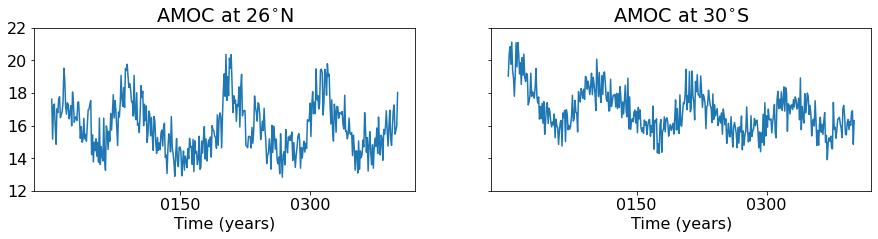

In [61]:
fig = plt.figure(figsize=(15,3))

plt.subplot(121)
psi_amoc_26N.plot()
plt.title('AMOC at 26$^{\circ}$N')
plt.ylim(12, 22)
plt.xlabel('Time (years)')

plt.subplot(122)
psi_amoc_30S.plot()
plt.title('AMOC at 30$^{\circ}$S')
plt.tick_params(labelleft=False)
plt.ylabel('')
plt.ylim(12, 22)
plt.xlabel('Time (years)');

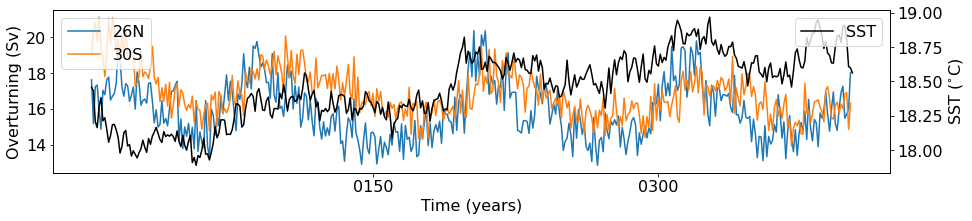

In [60]:
fig, ax1 = plt.subplots(figsize=(15,3))
psi_amoc_26N.plot(label='26N')
psi_amoc_30S.plot(label='30S')

ax2 = ax1.twinx()
temp_surface_ave.plot(color='k', label='SST')

ax1.legend(loc=2)
ax2.legend(loc=1)
ax1.set_xlabel('Time (years)')
ax1.set_title('')
ax2.set_title('')
ax1.set_ylabel('Overturning (Sv)')
ax2.set_ylabel('SST ($^{\circ}$C)');

100 years


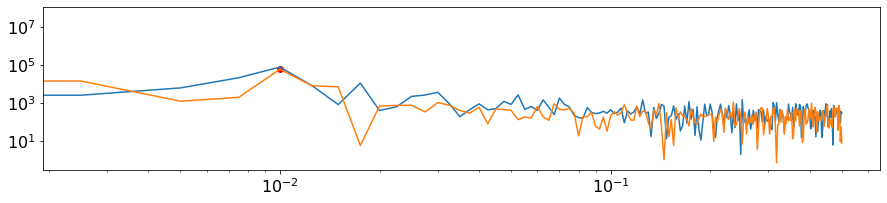

In [75]:
fig = plt.figure(figsize=(15,3))
freq, ps = get_spectrum(psi_amoc_26N)
plt.loglog(freq, ps[:])
freq, ps = get_spectrum(psi_amoc_30S)
plt.loglog(freq, ps[:])
plt.scatter(freq[4], ps[4], color='r')
print(int(np.round(1/freq[4])), 'years')

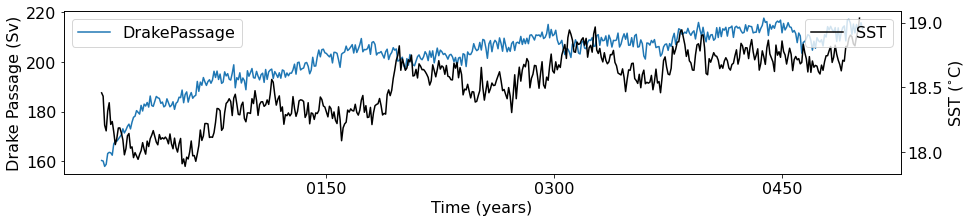

In [27]:
fig, ax1 = plt.subplots(figsize=(15,3))
DrakePassage.plot(label='DrakePassage')

ax2 = ax1.twinx()
temp_surface_ave.plot(color='k', label='SST')

ax1.legend(loc=2)
ax2.legend(loc=1)
ax1.set_xlabel('Time (years)')
ax1.set_title('')
ax2.set_title('')
ax1.set_ylabel('Drake Passage (Sv)')
ax2.set_ylabel('SST ($^{\circ}$C)');

#### CM2-1

In [31]:
%%time
# at 26$^{\circ}$N
psi_amoc_26N_CM_1 = get_AMOC(expt_CM2_1, session_CM2, 26, '0001-01-01', '0499-12-31')

CPU times: user 9min 16s, sys: 22.4 s, total: 9min 38s
Wall time: 13min 58s


In [32]:
# Save loaded data
psi_amoc_26N_CM_1.to_netcdf(path_to_data + '/Comparison_ACCESS_CM2_1/psi_AMOC_26N_annual_CM2_1.nc')

#### OM2 models

In [26]:
%%time
# at 26$^{\circ}$N
psi_amoc_26N_OM_1 = get_AMOC(expt_OM2_1, session_OM2, 26, '1900-01-01', '2400-12-31')

VariableNotFoundError: No files were found containing 'ty_trans_rho' in the '1deg_jra55_ryf9091_gadi' experiment

In [23]:
# Save loaded data
psi_amoc_26N_OM_1.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_1/psi_AMOC_26N_annual_OM2_1.nc')

NameError: name 'psi_amoc_26N_OM_1' is not defined

In [ ]:
%%time
# at 26$^{\circ}$N
psi_amoc_26N_OM_025 = get_AMOC(expt_OM2_025, session_OM2, 26, '1904-01-01', '2299-12-31', frequency='1 yearly')

In [63]:
# Save loaded data
psi_amoc_26N_OM_025.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_025/psi_AMOC_26N_annual_OM2_025.nc')

In [7]:
# Load data
psi_amoc_26N_CM_025 = xr.open_dataarray(path_to_data + '/psi_AMOC_26N_annual.nc')
psi_amoc_26N_OM_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/psi_AMOC_26N_annual_OM2_025.nc')
psi_amoc_26N_OM_1   = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/psi_AMOC_26N_annual_OM2_1.nc')
psi_amoc_26N_CM_1   = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/psi_AMOC_26N_annual_CM2_1.nc')

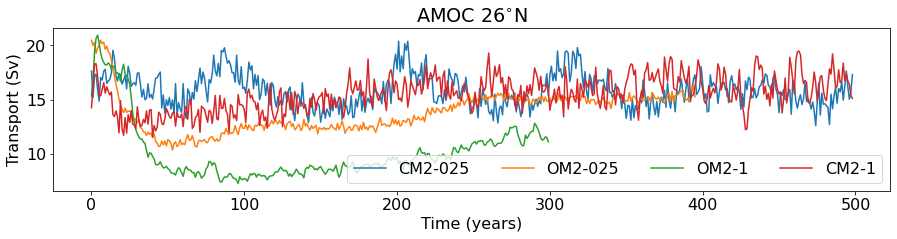

In [10]:
fig = plt.figure(figsize=(15,3))

plt.plot(psi_amoc_26N_CM_025, label='CM2-025')
plt.plot(psi_amoc_26N_OM_025, label='OM2-025')
plt.plot(psi_amoc_26N_OM_1, label='OM2-1')
plt.plot(psi_amoc_26N_CM_1, label='CM2-1')
plt.legend(ncol=4, loc=4)

plt.title('AMOC 26$^{\circ}$N')
plt.xlabel('Time (years)')
plt.ylabel('Transport (Sv)');

#### NADW formation

In [11]:
def calc_NADW_formation(expt, session, start_time, end_time, frequency='1 monthly'):
    
    var = cc.querying.getvar(expt, 'ty_trans_rho', session, frequency=frequency, start_time=start_time, end_time=end_time)
    var = var.sel(time=slice(start_time, end_time)).sel(grid_xt_ocean=slice(-70,20))
    psi_amoc = var.sum('grid_xt_ocean').sel(grid_yu_ocean=slice(50.,65.))*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt, 'ty_trans_rho_gm', session, frequency=frequency, start_time=start_time, end_time=end_time)
        var2 = var2.sel(time=slice(start_time, end_time)).sel(grid_xt_ocean=slice(-70,20))
        psi_amoc_gm = var2.sum('grid_xt_ocean').sel(grid_yu_ocean=slice(50.,65.))*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
    psi_amoc_sum = psi_amoc_sum.sel(potrho=slice(1035.5,None)).max('potrho').max('grid_yu_ocean')
    psi_amoc_sum = psi_amoc_sum.resample(time='Y').mean().compute()
    
    return psi_amoc_sum

CM2-025

In [12]:
%%time
psi_amoc_sum = calc_NADW_formation(expt_CM2_025, session_CM2, '0400-01-01', '0499-12-31')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datet

CPU times: user 2min 27s, sys: 9.14 s, total: 2min 36s
Wall time: 3min 25s


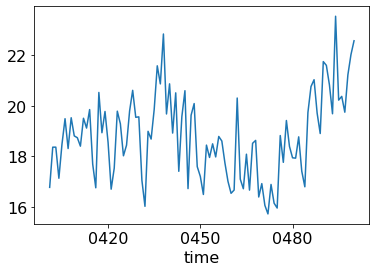

In [13]:
psi_amoc_sum.plot()

In [30]:
# Save loaded data
psi_amoc_sum.to_netcdf(path_to_data + 'psi_AMOC_50-65N_annual_300_400.nc')

In [63]:
# # Load, concatenate and save individual time series
# data1 = xr.open_dataarray(path_to_data + 'psi_AMOC_50-65N_annual_0_100.nc')
# data2 = xr.open_dataarray(path_to_data + 'psi_AMOC_50-65N_annual_100_200.nc')
# data3 = xr.open_dataarray(path_to_data + 'psi_AMOC_50-65N_annual_200_300.nc')
# data4 = xr.open_dataarray(path_to_data + 'psi_AMOC_50-65N_annual_300_400.nc')
# data = xr.concat([data1, data2, data3, data4], dim="time")

In [66]:
# data.to_netcdf(path_to_data + 'psi_AMOC_50-65N_annual_0_400.nc')

In [15]:
# data1 = xr.open_dataarray(path_to_data + 'psi_AMOC_50-65N_annual_0_400.nc')
# data = xr.concat([data1, psi_amoc_sum], dim="time")

In [18]:
data.to_netcdf(path_to_data + 'psi_AMOC_50-65N_annual.nc')

#### CM2-1

In [20]:
%%time
psi_amoc_sum = calc_NADW_formation(expt_CM2_1, session_CM2, '0001-01-01', '0499-12-31')

CPU times: user 8min 34s, sys: 19.5 s, total: 8min 54s
Wall time: 12min 43s


In [21]:
psi_amoc_sum.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/psi_AMOC_50-65N_annual_0_500_CM2_1.nc')

#### OM2-025

In [ ]:
# %%time
# # Loop to load+save OM2 data
# start_years = ['1900', '2000', '2100', '2200']
# end_years   = ['1999', '2099', '2199', '2299']
# for ii in range(4):
#     print('Working on:', start_years[ii], '-', end_years[ii])
#     psi_amoc_sum = calc_NADW_formation(expt_OM2_025, session_OM2, start_years[ii]+'-01-01', end_years[ii]+'-12-31', frequency='1 yearly')
#     print('Saving')
#     psi_amoc_sum.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/psi_AMOC_50-65N_annual_%s_%s_OM2_025.nc'%(start_years[ii],end_years[ii]))

In [46]:
psi_amoc_sum_start = calc_NADW_formation(expt_OM2_025, session_OM2, '1900-01-01', '1904-12-31', frequency='1 monthly')

GM term not found


In [47]:
psi_amoc_sum_start

<xarray.DataArray 'ty_trans_rho' (time: 4)>
array([28.506842, 26.315207, 25.743391, 25.62532 ], dtype=float32)
Coordinates:
  * time     (time) object 1900-12-31 00:00:00 ... 1903-12-31 00:00:00

In [ ]:
%%time
psi_amoc_sum = calc_NADW_formation(expt_OM2_025, session_OM2, '1900-01-01', '2299-12-31', frequency='1 yearly')

In [49]:
# Concat
data = xr.concat([psi_amoc_sum_start, psi_amoc_sum], dim="time")

In [54]:
# Saving
data.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/psi_AMOC_50-65N_annual_1900_2299_OM2_025.nc')

OM2-1

In [58]:
%%time
psi_amoc_sum = calc_NADW_formation(expt_OM2_1, session_OM2, '1900-01-01', '2299-12-31', frequency='1 yearly')

CPU times: user 25.1 s, sys: 1.86 s, total: 26.9 s
Wall time: 37.2 s


In [62]:
psi_amoc_sum.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/psi_AMOC_50-65N_annual_1900_2199_OM2_1.nc')

Plotting

In [22]:
NADW_CM2_025 = xr.open_dataarray(path_to_data + 'psi_AMOC_50-65N_annual.nc')  # psi_AMOC_50-65N_annual_0_400.nc
NADW_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/psi_AMOC_50-65N_annual_1900_2299_OM2_025.nc')
NADW_OM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/psi_AMOC_50-65N_annual_1900_2199_OM2_1.nc')
NADW_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/psi_AMOC_50-65N_annual_0_500_CM2_1.nc')

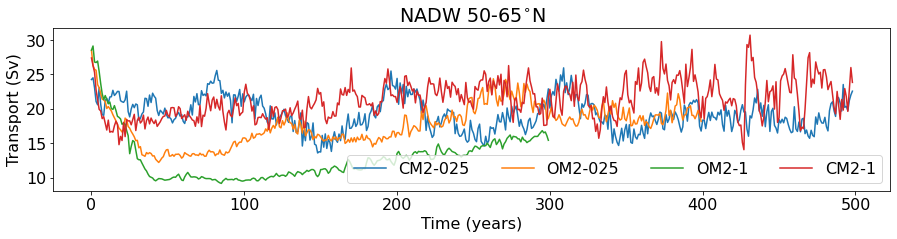

In [24]:
fig = plt.figure(figsize=(15,3))

plt.plot(NADW_CM2_025, label='CM2-025')
plt.plot(NADW_OM2_025, label='OM2-025')
plt.plot(NADW_OM2_1, label='OM2-1')
plt.plot(NADW_CM2_1, label='CM2-1')
plt.legend(ncol=4, loc=4)

plt.title('NADW 50-65$^{\circ}$N')
plt.xlabel('Time (years)')
plt.ylabel('Transport (Sv)');

### Area averages

In [ ]:
# Different depths
# Different basins

### Overturning streamfunctions

#### Global overturning

In [25]:
def compute_psi_rho(expt, session, frequency='1 monthly', nbound=None, start_time=None, end_time=None):
    rho = 1025 # mean density of sea-water in kg/m^3
    
    varlist = cc.querying.get_variables(session, expt)
    if varlist['name'].str.contains('ty_trans_rho_gm').any():
        GM = True
        print('GM is True')
        psiGM = cc.querying.getvar(expt, 'ty_trans_rho_gm', session, frequency=frequency, n=nbound, start_time=start_time, end_time=end_time)
        psiGM = psiGM.sum('grid_xt_ocean')
        psiGM = psiGM / (1e6*rho)
    else:
        GM = False
        print('GM is False')
        
    psi = cc.querying.getvar(expt, 'ty_trans_rho', session, frequency=frequency, n=nbound, start_time=start_time, end_time=end_time)      
    psi = psi / (1e6*rho) # converts kg/s to Sv
    psi = psi.sum('grid_xt_ocean').cumsum('potrho').mean(dim='time').load() 
    if GM:
        psi = psi + psiGM.mean('time')
        
    return psi.compute()

In [18]:
%%time
psi_CM2 = compute_psi_rho(expt_CM2_025, session_CM2, start_time='0210-01-01', end_time='0219-12-31')

GM is True
CPU times: user 5min 57s, sys: 27.6 s, total: 6min 25s
Wall time: 8min 16s


In [19]:
psi_CM2.to_netcdf(path_to_data + 'psi_210_220.nc')

In [26]:
%%time
psi_CM2_1 = compute_psi_rho(expt_CM2_1, session_CM2, start_time='0210-01-01', end_time='0219-12-31')

GM is True
CPU times: user 31.5 s, sys: 2.31 s, total: 33.9 s
Wall time: 51.1 s


In [27]:
psi_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/psi_210_220_CM2_1.nc')

In [8]:
%%time
psi_OM2_025 = compute_psi_rho(expt_OM2_025, session_OM2, frequency='1 yearly', start_time='2190-01-01', end_time='2199-12-31')

GM is False
CPU times: user 42.6 s, sys: 5.82 s, total: 48.5 s
Wall time: 1min 34s


In [9]:
psi_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/psi_210_220_OM2_025.nc')

In [12]:
%%time
psi_OM2_1 = compute_psi_rho(expt_OM2_1, session_OM2, frequency='1 yearly', start_time='2190-01-01', end_time='2199-12-31')

GM is True
CPU times: user 26.4 s, sys: 2.58 s, total: 29 s
Wall time: 30.8 s


In [13]:
psi_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/psi_210_220_OM2_1.nc')

Plotting

In [16]:
# Load data 
psi_CM2     = xr.open_dataarray(path_to_data + 'psi_210_220.nc')
psi_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/psi_210_220_OM2_025.nc')
psi_OM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/psi_210_220_OM2_1.nc')
psi_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/psi_210_220_CM2_1.nc')

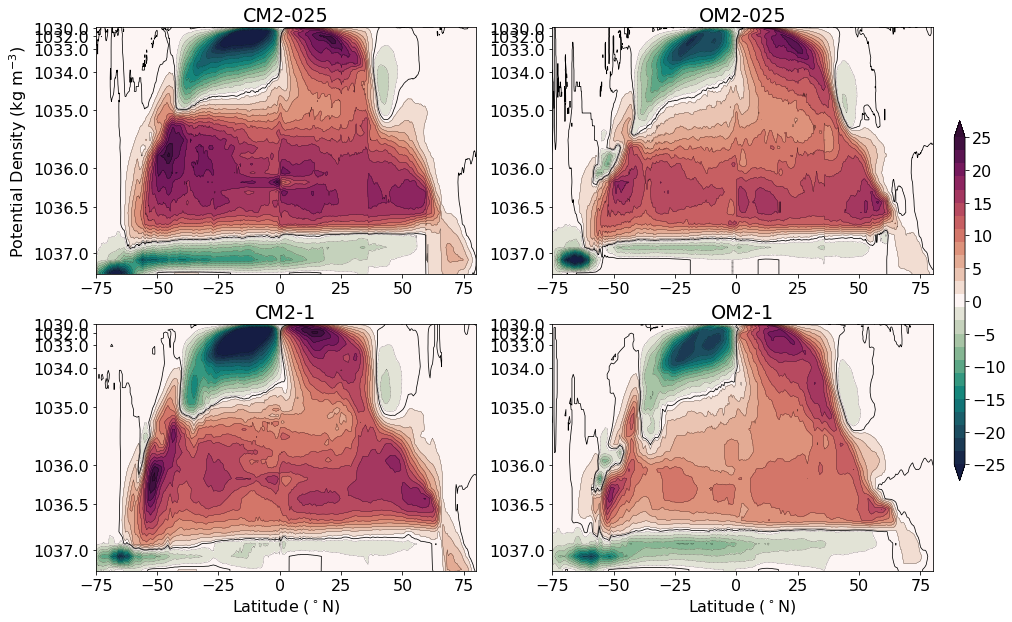

In [30]:
clev=np.arange(-25,27,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac  = 4  ## A power to set the stretching of the y-axis

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax0 = ax[0,0]
ax1 = ax[0,1]
ax2 = ax[1,0]
ax3 = ax[1,1]

# CM2-025
p1 = ax0.contourf(psi_CM2.grid_yu_ocean,(psi_CM2.potrho-1028)**scfac, psi_CM2, cmap=cm.cm.curl, levels=clev, extend='both')
ax0.contour(psi_CM2.grid_yu_ocean,(psi_CM2.potrho-1028)**scfac, psi_CM2, levels=clev, colors='k', linewidths=0.25)
ax0.contour(psi_CM2.grid_yu_ocean,(psi_CM2.potrho-1028)**scfac, psi_CM2, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025')

# OM2-025
p1 = ax1.contourf(psi_OM2_025.grid_yu_ocean,(psi_OM2_025.potrho-1028)**scfac, psi_OM2_025, cmap=cm.cm.curl, levels=clev, extend='both')
ax1.contour(psi_OM2_025.grid_yu_ocean,(psi_OM2_025.potrho-1028)**scfac, psi_OM2_025, levels=clev, colors='k', linewidths=0.25)
ax1.contour(psi_OM2_025.grid_yu_ocean,(psi_OM2_025.potrho-1028)**scfac, psi_OM2_025, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('OM2-025')

# CM2-1
p1 = ax2.contourf(psi_CM2_1.grid_yu_ocean,(psi_CM2_1.potrho-1028)**scfac, psi_CM2_1, cmap=cm.cm.curl, levels=clev, extend='both')
ax2.contour(psi_CM2_1.grid_yu_ocean,(psi_CM2_1.potrho-1028)**scfac, psi_CM2_1, levels=clev, colors='k', linewidths=0.25)
ax2.contour(psi_CM2_1.grid_yu_ocean,(psi_CM2_1.potrho-1028)**scfac, psi_CM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax2.set_yticks((yticks-1028)**scfac)
ax2.set_yticklabels(yticks)
ax2.set_ylim([0.5**scfac, 9.2**scfac])
ax2.invert_yaxis()
ax2.set_xlabel('Latitude ($^\circ$N)')
ax2.set_xlim([-75,80])
ax2.set_title('CM2-1')

# OM2-1
p1 = ax3.contourf(psi_OM2_1.grid_yu_ocean,(psi_OM2_1.potrho-1028)**scfac, psi_OM2_1, cmap=cm.cm.curl, levels=clev, extend='both')
ax3.contour(psi_OM2_1.grid_yu_ocean,(psi_OM2_1.potrho-1028)**scfac, psi_OM2_1, levels=clev, colors='k', linewidths=0.25)
ax3.contour(psi_OM2_1.grid_yu_ocean,(psi_OM2_1.potrho-1028)**scfac, psi_OM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax3.set_yticks((yticks-1028)**scfac)
ax3.set_yticklabels(yticks)
ax3.set_ylim([0.5**scfac, 9.2**scfac])
ax3.invert_yaxis()
ax3.set_xlabel('Latitude ($^\circ$N)')
ax3.set_xlim([-75,80])
ax3.set_title('OM2-1')

# Plot colorbar
cax  = plt.axes([0.92, 0.25, 0.01, 0.5])
cbar = plt.colorbar(p1, cax=cax, orientation='vertical', ticks=np.arange(-25, 30, 5))
cbar.ax.set_xlabel('Sv');

In [56]:
# CM2-025
test = psi_CM2.sel(grid_yu_ocean=slice(-90,-50))
print(test.min().values, 'Sv')
print(test.potrho[test.argmin(...)['potrho']].values, '(kg m-3)')
print(test.grid_yu_ocean[test.argmin(...)['grid_yu_ocean']].values, '(deg N)')

-31.189722061157227 Sv
1037.1875 (kg m-3)
-66.55719481816074 (deg N)


In [54]:
# OM2-025
test = psi_OM2_025.sel(grid_yu_ocean=slice(-90,-50))
print(test.min().values, 'Sv')
print(test.potrho[test.argmin(...)['potrho']].values, '(kg m-3)')
print(test.grid_yu_ocean[test.argmin(...)['grid_yu_ocean']].values, '(deg N)')

-35.02635192871094 Sv
1037.0625 (kg m-3)
-66.13480046134107 (deg N)


#### Basin-averaged overturning

- Atlantic basin overturning differs between decadal variability max years (stronger overturning) and min years (weaker overturning)
- OM2-025 has a very distinct and strong SO cell south of 70S (Weddell Sea?) that misses a deep cell further north, the CM2-025 does a better job in that regard.

Make mask first

In [9]:
def get_mask(expt, session):
    
    # Load bathymetry
    ht = cc.querying.getvar(expt, 'ht', session, n=-1)
    
    # Mask array (1 ocean, 0 land)
    land_mask = ~ht.isnull()
    
    ## create masks out of the above chunks
    south_map = (land_mask.where(land_mask.yt_ocean < -34)).fillna(0) 
    indo_map1 = (land_mask.where(land_mask.yt_ocean < 9).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-65)).fillna(0) 
    indo_map2 = (land_mask.where(land_mask.yt_ocean < 15).where(land_mask.yt_ocean > 9).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-83.7)).fillna(0) 
    indo_map3 = (land_mask.where(land_mask.yt_ocean < 17).where(land_mask.yt_ocean > 15).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-93.3)).fillna(0) 
    indo_map4 = (land_mask.where(land_mask.yt_ocean < 85).where(land_mask.yt_ocean > 17).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-99)).fillna(0) 
    indo_map5 = (land_mask.where(land_mask.yt_ocean < 30.5).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >25).where(land_mask.xt_ocean<80)).fillna(0) 
    indo_sector_map = indo_map1 + indo_map2 + indo_map3 + indo_map4 + indo_map5 + south_map
    indo_sector_mask = indo_sector_map.where(indo_sector_map>0)
    atlantic_sector_map = (indo_sector_mask * 0).fillna(1) * land_mask
    atlantic_sector_map = atlantic_sector_map + south_map
    atlantic_sector_mask = atlantic_sector_map.where(atlantic_sector_map>0)

    # Mask above is on (yt_ocean, xt_ocean) but we need (yu_ocean, xt_ocean)
    psi = cc.querying.getvar(expt, 'ty_trans_rho', session, n=1) ## needs to be the same coordinates as what you want to mask
    atlantic_sector_mask.coords['xt_ocean'] = psi.grid_xt_ocean.values
    atlantic_sector_mask.coords['yt_ocean'] = psi.grid_yu_ocean.values
    atlantic_sector_mask = atlantic_sector_mask.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yu_ocean'})
    indo_sector_mask.coords['xt_ocean'] = psi.grid_xt_ocean.values
    indo_sector_mask.coords['yt_ocean'] = psi.grid_yu_ocean.values
    indo_sector_mask = indo_sector_mask.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yu_ocean'})
    
    return atlantic_sector_mask, indo_sector_mask

Function to calculate overturning for specific basin mask

In [10]:
def compute_basin_psi_rho(expt, session, basin_mask, frequency='1 monthly', nbound=None, start_time=None, end_time=None):
    rho = 1025 # mean density of sea-water in kg/m^3
    
    varlist = cc.querying.get_variables(session, expt)
    if varlist['name'].str.contains('ty_trans_rho_gm').any():
        GM = True
        print('GM is True')
        psiGM = cc.querying.getvar(expt, 'ty_trans_rho_gm', session, frequency=frequency, n=nbound, start_time=start_time, end_time=end_time)
        psiGM = psiGM.sum('grid_xt_ocean')
        psiGM = psiGM / (1e6*rho)
    else:
        GM = False
        print('GM is False')
        
    psi = cc.querying.getvar(expt, 'ty_trans_rho', session, frequency=frequency, n=nbound, start_time=start_time, end_time=end_time)      
    psi = psi / (1e6*rho) # converts kg/s to Sv
    psi = (psi * basin_mask).sum('grid_xt_ocean').cumsum('potrho').mean(dim='time').load() 
    if GM:
        psi = psi + psiGM.mean('time')
        
    return psi.compute()

CM2-025

In [9]:
%%time
atlantic_sector_mask_CM2, indo_sector_mask_CM2 = get_mask(expt_CM2_025, session_CM2)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

CPU times: user 8.84 s, sys: 2.79 s, total: 11.6 s
Wall time: 39.7 s


In [ ]:
%%time
atlantic_psi_CM2 = compute_basin_psi_rho(expt_CM2_025, session_CM2, atlantic_sector_mask_CM2, start_time='0210-01-01', end_time='0219-12-31')

In [10]:
%%time
indo_psi_CM2 = compute_basin_psi_rho(expt_CM2_025, session_CM2, indo_sector_mask_CM2, start_time='0210-01-01', end_time='0219-12-31')

GM is True


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array

CPU times: user 6min 26s, sys: 33.6 s, total: 6min 59s
Wall time: 8min 20s


In [11]:
indo_psi_CM2

<xarray.DataArray (potrho: 80, grid_yu_ocean: 1080)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.00884543e-04, -2.09638587e-04, -7.27690858e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.99356679e-04, -2.09125501e-04, -7.48462699e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.98637989e-04, -2.10371305e-04, -7.71013292e-05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.43135804e-07, -1.17123257e-07, -1.29448123e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.18879278e-07, -3.46351996e-08, -1.23788313e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.86916274e-08, -2.39053861e-08,  1.29058852e-09]])
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03

In [ ]:
atlantic_psi_CM2.to_netcdf(path_to_data + 'atlantic_psi_210_220.nc')

In [12]:
indo_psi_CM2.to_netcdf(path_to_data + 'indopacific_psi_210_220.nc')

In [10]:
%%time
atlantic_psi_CM2 = compute_basin_psi_rho(expt_CM2_025, session_CM2, atlantic_sector_mask_CM2, start_time='0260-01-01', end_time='0269-12-31')

GM is True


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array

CPU times: user 6min 48s, sys: 33 s, total: 7min 21s
Wall time: 8min 41s


In [12]:
atlantic_psi_CM2.to_netcdf(path_to_data + 'atlantic_psi_260_270.nc')

In [10]:
%%time
indo_psi_CM2 = compute_basin_psi_rho(expt_CM2_025, session_CM2, indo_sector_mask_CM2, start_time='0260-01-01', end_time='0269-12-31')

GM is True


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

CPU times: user 6min 45s, sys: 33.3 s, total: 7min 18s
Wall time: 8min 50s


In [11]:
indo_psi_CM2.to_netcdf(path_to_data + 'indopacific_psi_260_270.nc')

CM2-1

In [ ]:
%%time
atlantic_sector_mask_CM2_1, indo_sector_mask_CM2_1 = get_mask(expt_CM2_1, session_CM2)

In [34]:
%%time
atlantic_psi_CM2_1 = compute_basin_psi_rho(expt_CM2_1, session_CM2, atlantic_sector_mask_CM2_1, start_time='0210-01-01', end_time='0219-12-31')

GM is True
CPU times: user 26 s, sys: 1.35 s, total: 27.3 s
Wall time: 33 s


In [35]:
atlantic_psi_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/atlantic_psi_210_220_CM2_1.nc')

In [36]:
%%time
indo_psi_CM2_1 = compute_basin_psi_rho(expt_CM2_1, session_CM2, indo_sector_mask_CM2_1, start_time='0210-01-01', end_time='0219-12-31')

GM is True
CPU times: user 25 s, sys: 1.27 s, total: 26.3 s
Wall time: 31.1 s


In [37]:
indo_psi_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/indopacific_psi_210_220_CM2_1.nc')

OM2-025

In [10]:
%%time
atlantic_sector_mask_OM2_025, indo_sector_mask_OM2_025 = get_mask(expt_OM2_025, session_OM2)

CPU times: user 4.71 s, sys: 1.05 s, total: 5.76 s
Wall time: 27.3 s


In [12]:
%%time
atlantic_psi_OM2_025 = compute_basin_psi_rho(expt_OM2_025, session_OM2, atlantic_sector_mask_OM2_025, frequency='1 yearly', start_time='2190-01-01', end_time='2199-12-31')

GM is False
CPU times: user 1min 39s, sys: 28 s, total: 2min 7s
Wall time: 5min 31s


In [13]:
atlantic_psi_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/atlantic_psi_2190_2199_OM2_025.nc')

In [14]:
%%time
indo_psi_OM2_025 = compute_basin_psi_rho(expt_OM2_025, session_OM2, indo_sector_mask_OM2_025, frequency='1 yearly', start_time='2190-01-01', end_time='2199-12-31')

GM is False
CPU times: user 1min 24s, sys: 22.6 s, total: 1min 46s
Wall time: 3min 21s


In [15]:
indo_psi_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/indopacific_psi_2190_2199_OM2_025.nc')

OM2-1

In [13]:
%%time
atlantic_sector_mask_OM2_1, indo_sector_mask_OM2_1 = get_mask(expt_OM2_1, session_OM2)

CPU times: user 3.42 s, sys: 597 ms, total: 4.01 s
Wall time: 6.49 s


In [17]:
%%time
atlantic_psi_OM2_1 = compute_basin_psi_rho(expt_OM2_1, session_OM2, atlantic_sector_mask_OM2_1, start_time='2190-01-01', end_time='2199-12-31')

GM is True
CPU times: user 1min 8s, sys: 20.5 s, total: 1min 29s
Wall time: 2min 45s


In [20]:
atlantic_psi_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/atlantic_psi_2190_2199_OM2_1.nc')

In [21]:
%%time
indo_psi_OM2_1 = compute_basin_psi_rho(expt_OM2_1, session_OM2, indo_sector_mask_OM2_1, start_time='2190-01-01', end_time='2199-12-31')

GM is True
CPU times: user 1min 13s, sys: 20.3 s, total: 1min 33s
Wall time: 3min 29s


In [23]:
indo_psi_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/indopacific_psi_2190_2199_OM2_1.nc')

##### Plotting

In [8]:
def plot_basin_overturning(atlantic_psi, indopacific_psi):

    clev=np.arange(-25,27,2)
    yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
    scfac = 4  ## A power to set the stretching of the y-axis

    fig, ax=plt.subplots(1,2, figsize=(15,5))

    ## Plotting Atlantic Sector
    p1=ax[0].contourf(atlantic_psi.grid_yu_ocean,(atlantic_psi.potrho-1028)**scfac, atlantic_psi, cmap=cm.cm.curl, levels=clev, extend='both')
    ax[0].contour(atlantic_psi.grid_yu_ocean,(atlantic_psi.potrho-1028)**scfac, atlantic_psi, levels=clev, colors='k', linewidths=0.25)
    ax[0].contour(atlantic_psi.grid_yu_ocean,(atlantic_psi.potrho-1028)**scfac, atlantic_psi, levels=[0.0,], colors='k', linewidths=0.75)
    ax[0].set_yticks((yticks-1028)**scfac)
    ax[0].set_yticklabels(yticks)
    ax[0].set_ylim([0.5**scfac, 9.2**scfac])
    ax[0].invert_yaxis()
    ax[0].set_ylabel('Potential Density (kg m$^{-3}$)')
    ax[0].set_xlabel('Latitude ($^\circ$N)')
    ax[0].set_xlim([-75,80])
    ax[0].set_title('Atlantic Sector Overturning')


    ## Plotting Indo-Pacific Sector
    p1=ax[1].contourf(indopacific_psi.grid_yu_ocean,(indopacific_psi.potrho-1028)**scfac, indopacific_psi, cmap=cm.cm.curl, levels=clev, extend='both')
    ax[1].contour(indopacific_psi.grid_yu_ocean,(indopacific_psi.potrho-1028)**scfac, indopacific_psi, levels=clev, colors='k', linewidths=0.25)
    ax[1].contour(indopacific_psi.grid_yu_ocean,(indopacific_psi.potrho-1028)**scfac, indopacific_psi, levels=[0.0,], colors='k', linewidths=0.75)
    ax[1].set_yticks((yticks-1028)**scfac)
    ax[1].set_yticklabels(yticks)
    ax[1].set_ylim([0.5**scfac, 9.2**scfac])
    ax[1].invert_yaxis()
    ax[1].set_xlabel('Latitude ($^\circ$N)')
    ax[1].set_xlim([-75,65])
    ax[1].set_title('Indo-Pacific Sector Overturning');

    # Plot colorbar
    cax  = plt.axes([0.92, 0.25, 0.01, 0.5])
    cbar = plt.colorbar(p1, cax=cax, orientation='vertical')
    cbar.ax.set_xlabel('Sv');

Load data

In [23]:
atlantic_psi_CM2_100_110    = xr.open_dataarray(path_to_data + 'atlantic_psi_100_110.nc')
indopacific_psi_CM2_100_110 = xr.open_dataarray(path_to_data + 'indopacific_psi_100_110.nc')

In [7]:
atlantic_psi_CM2_210_220    = xr.open_dataarray(path_to_data + 'atlantic_psi_210_220.nc')
indopacific_psi_CM2_210_220 = xr.open_dataarray(path_to_data + 'indopacific_psi_210_220.nc')

In [13]:
atlantic_psi_CM2_260_270    = xr.open_dataarray(path_to_data + 'atlantic_psi_260_270.nc')
indopacific_psi_CM2_260_270 = xr.open_dataarray(path_to_data + 'indopacific_psi_260_270.nc')

In [20]:
atlantic_psi_OM2_025    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/atlantic_psi_2190_2199_OM2_025.nc')
indopacific_psi_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/indopacific_psi_2190_2199_OM2_025.nc')

In [19]:
atlantic_psi_OM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/atlantic_psi_2190_2199_OM2_1.nc')
indopacific_psi_OM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/indopacific_psi_2190_2199_OM2_1.nc')

In [14]:
atlantic_psi_CM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/atlantic_psi_210_220_CM2_1.nc')
indopacific_psi_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/indopacific_psi_210_220_CM2_1.nc')

In [ ]:
# MLD from OM2-1
mld = cc.querying.getvar(expt_OM2_1, 'mld', session_OM2, start_time='1900-01-01', end_time='2400-12-31', frequency='1 monthly')
mld_NA = mld.sel(xt_ocean=slice(-100, 50)).sel(yt_ocean=slice(50,80)).sel(time=slice('1900-01-01','2400-12-31')).resample(time='Y').mean()
mld_WS = mld.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63)).sel(time=slice('1900-01-01','2400-12-31')).resample(time='Y').mean()

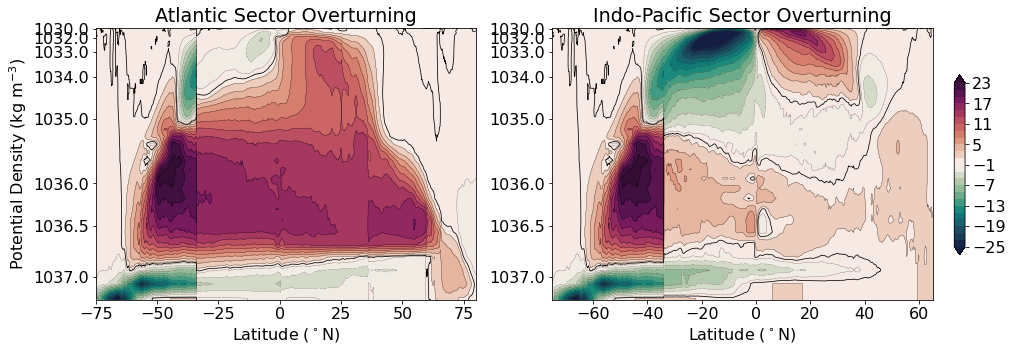

In [24]:
plot_basin_overturning(atlantic_psi_CM2_100_110, indopacific_psi_CM2_100_110)

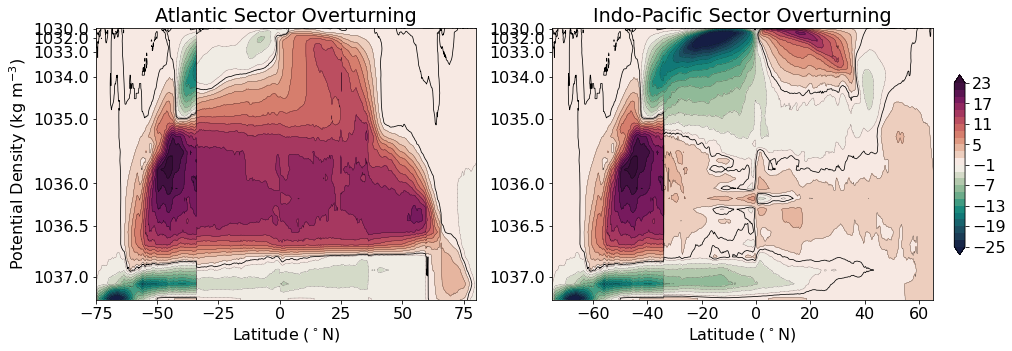

In [25]:
plot_basin_overturning(atlantic_psi_CM2_210_220, indopacific_psi_CM2_210_220)

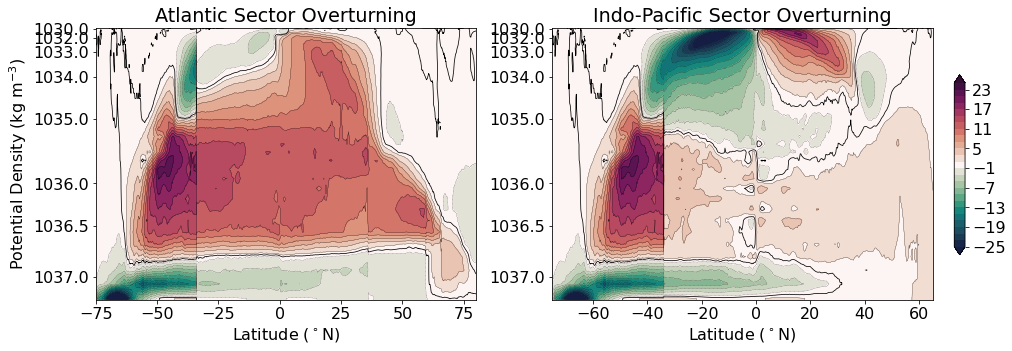

In [15]:
plot_basin_overturning(atlantic_psi_CM2_260_270, indopacific_psi_CM2_260_270)

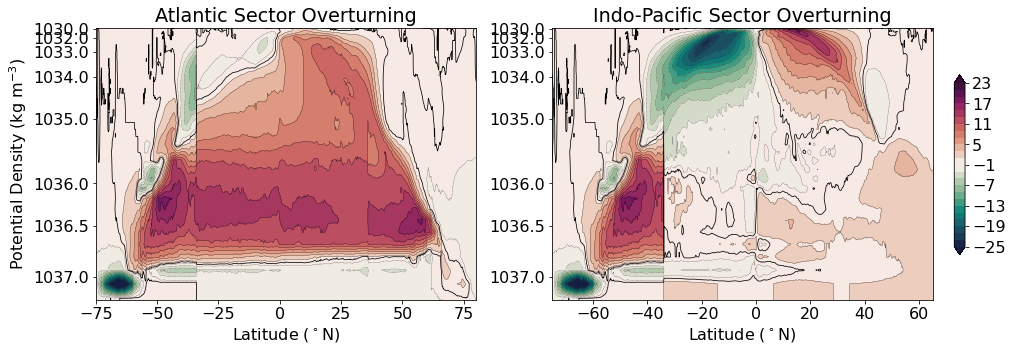

In [26]:
plot_basin_overturning(atlantic_psi_OM2_025, indopacific_psi_OM2_025)

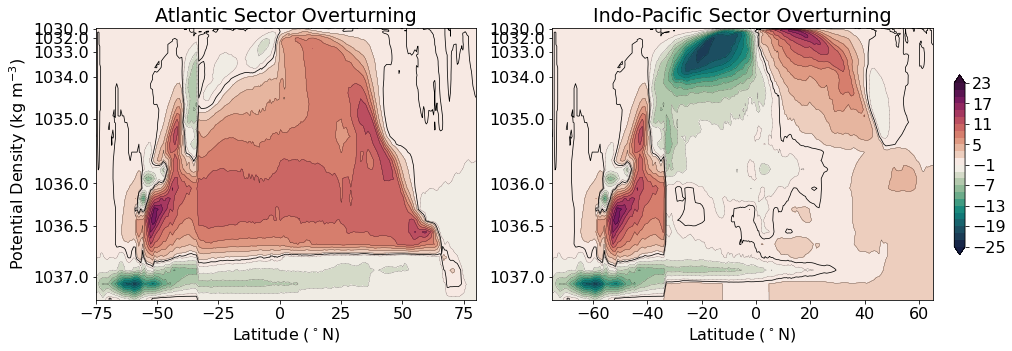

In [27]:
plot_basin_overturning(atlantic_psi_OM2_1, indopacific_psi_OM2_1)

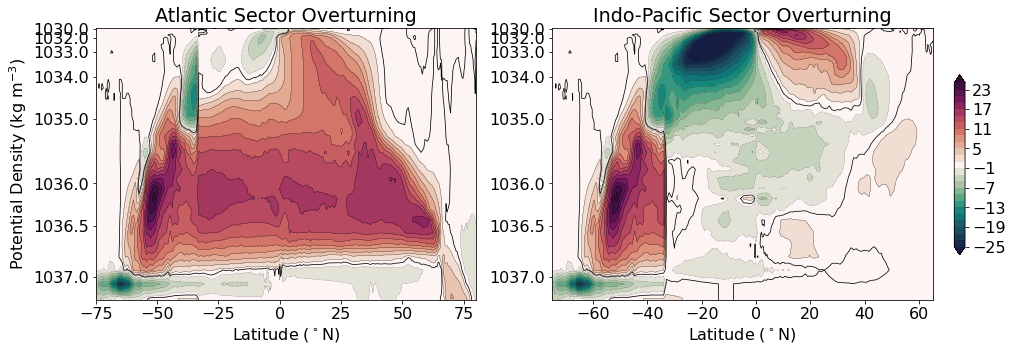

In [15]:
plot_basin_overturning(atlantic_psi_CM2_1, indopacific_psi_CM2_1)